In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv('/Users/kryvoshei/Downloads/applications.csv')
df_1 = pd.read_csv('/Users/kryvoshei/Downloads/industries.csv')
df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [198]:
df = df.drop_duplicates(subset=['applicant_id'])

In [199]:
df['External Rating'] = df['External Rating'].fillna(0)

In [200]:
df['Education level'] = df['Education level'].fillna('Середня')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13278 entries, 0 to 13314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applied at       13278 non-null  object 
 1   Amount           13245 non-null  float64
 2   Age              13278 non-null  int64  
 3   Gender           13278 non-null  object 
 4   Industry         13278 non-null  object 
 5   Marital status   13278 non-null  object 
 6   External Rating  13278 non-null  float64
 7   Education level  13278 non-null  object 
 8   Location         11506 non-null  object 
 9   applicant_id     13278 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [202]:
df_combined = pd.merge(df, df_1, on='Industry', how='left')
df_combined.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15


In [220]:
df_combined['Applied at'] = pd.to_datetime(df_combined['Applied at'], format='%m.%d.%Y %H:%M:%S', dayfirst=True, errors='coerce')
df_combined['Weekday'] = df_combined['Applied at'].dt.day_name()
df_combined.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Weekday,Age_Score,Applied_Score,Married_Score,Location_Score,df_1_Score,ER>=7_Score,ER<=2_Score,Total_Score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,0,20,0,0,0.0,20,0,40.0
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,Wednesday,40,40,20,20,40.0,20,20,200.0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,10,30,10,10,20.0,10,10,100.0
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,Wednesday,15,35,15,15,30.0,15,35,160.0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,15,35,15,15,30.0,15,15,140.0


In [221]:
df_combined['Age_Score'] = df_combined['Age'].between(35, 55).astype(int)*20 #вік заявщика між 35 та 55, до рейтингу додається 20 балів

In [222]:
df_combined['Applied_Score'] = (df_combined['Applied at'].dt.dayofweek <= 5).astype(int) * 20 #заявка була подана не у вихідні, до рейтингу додається 20 балів

In [223]:
df_combined['Married_Score'] = df_combined['Marital status'].eq('Married').astype(int) * 20 #заявщик одружений, до рейтингу додається 20 балів

In [224]:
df_combined['Location_Score'] = df_combined['Location'].isin(['Kyiv', 'Kyiv Oblast']).astype(int) * 10 #заявщик знаходиться в Києві чи області, до рейтингу додається 10 балів

In [225]:
df_combined['df_1_Score'] = df_combined['Score'] + df_1['Score'] # Значення 'Score' з таблиці industries.csv також додається до заявки (і складає від 0 до 20 балів)

In [226]:
df_combined['ER>=7_Score'] = (df_combined['External Rating'] >= 7).astype(int) * 20 #'External Rating' більше чи дорівнює 7, до рейтингу додається 20 балів

In [227]:
df_combined['ER<=2_Score'] = (df_combined['External Rating'] <= 2).astype(int) * -20 #'External Rating' менше чи дорівнює 2, з рейтингу віднімається 20 балів

In [228]:
df_combined['Total_Score'] = df_combined[['Age_Score', 'Applied_Score', 'Married_Score', 'Location_Score', 'df_1_Score', 'ER>=7_Score', 'ER<=2_Score']].sum(axis=1)

In [229]:
# Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю
df_combined['Total_Score'] = (
    df_combined['Total_Score'] +
    ((df_combined['Amount'].notnull()) & (df_combined['External Rating'] != 0)).astype(int) * 0 +
    ((df_combined['Amount'].isnull()) | (df_combined['External Rating'] == 0)).astype(int) * 0
)

In [230]:
df_combined_accepted = df_combined[df_combined['Total_Score'] > 0]
df_combined_accepted.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Weekday,Age_Score,Applied_Score,Married_Score,Location_Score,df_1_Score,ER>=7_Score,ER<=2_Score,Total_Score
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,Wednesday,0,20,0,0,0.0,20,0,40.0
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,Wednesday,20,20,0,0,40.0,0,0,80.0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,Wednesday,0,20,0,0,20.0,0,0,40.0
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,Wednesday,0,20,0,0,30.0,0,-20,30.0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,Wednesday,0,20,0,0,30.0,0,0,50.0


In [231]:
weekly_score = df_combined.groupby(df_combined['Applied at'].dt.to_period("W-Mon"))['Total_Score'].mean()

In [232]:
weekly_score.head()

Applied at
2022-11-29/2022-12-05    36.083885
2022-12-13/2022-12-19    32.058824
2022-12-20/2022-12-26    31.470588
2022-12-27/2023-01-02    34.205794
Freq: W-MON, Name: Total_Score, dtype: float64

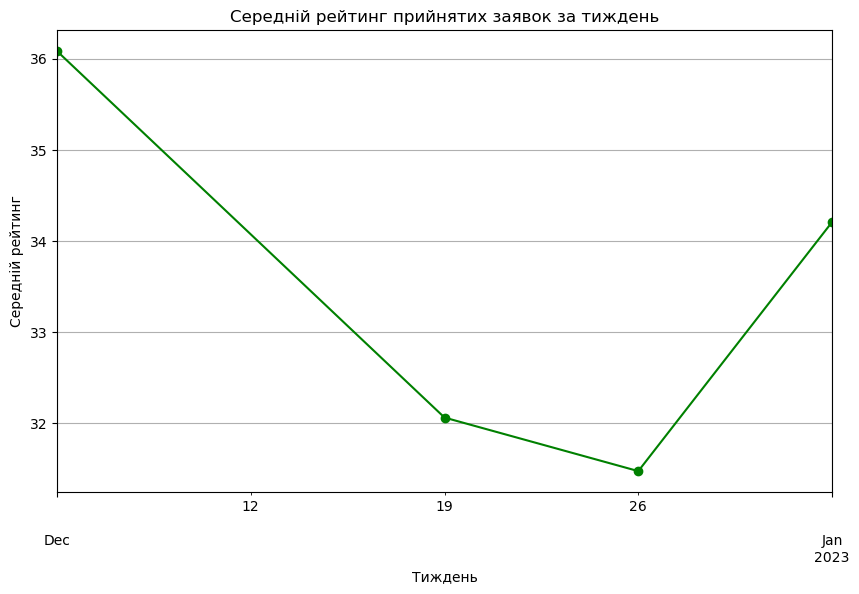

In [233]:
plt.figure(figsize=(10, 6))
weekly_score.plot(marker='o', color = 'green')
plt.title('Середній рейтинг прийнятих заявок за тиждень')
plt.xlabel('Тиждень')
plt.ylabel('Середній рейтинг')
plt.grid(True)
plt.show()